

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
petrol = pd.read_csv('petrol.csv')

In [37]:
petrol.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [38]:
petrol.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


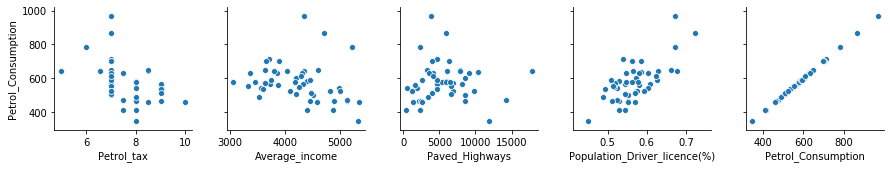

In [39]:
sns.pairplot(petrol,x_vars=petrol.columns, y_vars= 'Petrol_Consumption')
plt.show()

In [40]:
petrol['Petrol_tax'].value_counts()
# it is categorical column

7.00     19
8.00     10
9.00      8
7.50      4
8.50      3
6.58      1
6.00      1
5.00      1
10.00     1
Name: Petrol_tax, dtype: int64

In [41]:
petrol.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [42]:
q1 = petrol.quantile(0.25)
q1

Petrol_tax                         7.00000
Average_income                  3739.00000
Paved_Highways                  3110.25000
Population_Driver_licence(%)       0.52975
Petrol_Consumption               509.50000
Name: 0.25, dtype: float64

In [43]:
q3 = petrol.quantile(0.75)
q3

Petrol_tax                         8.12500
Average_income                  4578.75000
Paved_Highways                  7156.00000
Population_Driver_licence(%)       0.59525
Petrol_Consumption               632.75000
Name: 0.75, dtype: float64

In [44]:
iqr = q3 - q1
iqr

Petrol_tax                         1.1250
Average_income                   839.7500
Paved_Highways                  4045.7500
Population_Driver_licence(%)       0.0655
Petrol_Consumption               123.2500
dtype: float64

In [45]:
df = petrol[~ ((petrol < (q1 - 1.5 * iqr)) | (petrol > (q3 + 1.5 * iqr))).any(axis=1)]
df.shape

(43, 5)

# Question 3 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [46]:
x = petrol.drop(columns='Petrol_Consumption')
y = petrol['Petrol_Consumption']

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, test_size=0.3)

In [49]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(33, 4)
(15, 4)
(33,)
(15,)


# Question 5 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [53]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

C:\Users\Karangula\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     22.71
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.91e-10
Time:                        19:17:40   Log-Likelihood:                -266.79
No. Observations:                  48   AIC:                             543.6
Df Residuals:                      43   BIC:                             552.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          377.2911    185.541      2.033      0.048       3.112     751.471
Petrol_tax                     -34.7901     12.970     -2.682      0.010     -60.947      -8.633
Average_income                  -0.0666      0.017     -3.867      0.000      -0.101      -0.032
Paved_Highways                  -0.0024      0.003     -0.716      0.478      -0.009       0.004
Population_Driver_licence(%)  1336.4494    192.298      6.950      0.000     948.643    1724.256
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.510
Skew:                           1.056   Prob(JB):                     5.80e-05
Kurtosis:                       5.300   Cond. No.                     1.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# R-Square 

# Question 6 - Evaluate the model 
Calculate the accuracy score for the above model.

In [54]:
model.rsquared

0.6786867115698207

# Question 7: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


# Question 8: Print the coefficients of the multilinear regression model

# Question 9
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer